<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/principal_component_analysis_default_payments_andres_rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Andes Julian Lopez</b>- A01793899</h1>
<h1><b>Rodrigo Ildefonso Roman Guzman</b>-A01794225</h1>
<h1>Principal Component Analysis (PCA)|Actividad Semanal -- 4| Jobish Vallikavungal Devassia</h1>

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
dataset = pd.read_csv(path)


<h3>Cleaning the data</h3>

In [ ]:
from scipy import stats

#Separamos las variables categoricas y dejamos afuera la variable y (obejtivo)
nonCategorical = [dataset.iloc[:,1:2].copy(),dataset.iloc[:,12:-1].copy()]

filledDataset = pd.concat(nonCategorical,axis =1, sort=False)

#Como tenemos suficientes datos podemos deshacernos de las filas que tienen elementos vacios
filledDataset.dropna(axis = 0,inplace = True)


print(filledDataset)

           X1       X12       X13       X14      X15      X16      X17  \
0       20000    3913.0    3102.0     689.0      0.0      0.0      0.0   
1      120000    2682.0    1725.0    2682.0   3272.0   3455.0   3261.0   
2       90000   29239.0   14027.0   13559.0  14331.0  14948.0  15549.0   
3       50000   46990.0   48233.0   49291.0  28314.0  28959.0  29547.0   
4       50000    8617.0    5670.0   35835.0  20940.0  19146.0  19131.0   
...       ...       ...       ...       ...      ...      ...      ...   
29995  220000  188948.0  192815.0  208365.0  88004.0  31237.0  15980.0   
29996  150000    1683.0    1828.0    3502.0   8979.0   5190.0      0.0   
29997   30000    3565.0    3356.0    2758.0  20878.0  20582.0  19357.0   
29998   80000   -1645.0   78379.0   76304.0  52774.0  11855.0  48944.0   
29999   50000   47929.0   48905.0   49764.0  36535.0  32428.0  15313.0   

           X18      X19      X20     X21      X22     X23  
0          0.0    689.0      0.0     0.0      0.0  

<h2>Estandarizamos los datos con StandardScaler</h2>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Escalar los datos con standarizacion
sc = StandardScaler()
scaledData = sc.fit_transform(filledDataset)


72.8125806593967


<h2>Paso 1</h2>
<h3>Extraccion de componentes principales</h3>

In [ ]:
#Realizamos la extraccion de componentes principales
pca = PCA()
pca.fit(scaledData)
pcaData = pca.transform(scaledData)

#Creamos un diccionario con los valores promedio de varianza y la varianza acumulada de los componentes principales
dictionaryVariance = {
    'Porcentaje de varianza':np.round(pca.explained_variance_ratio_,3)*100,
    'Porcentaje acumulado de varianza':np.cumsum(pca.explained_variance_ratio_)*100
    }

#Creamos las etiquetas para los componentes principales
labels = [f'PC{i+1}'for i in range(len(filledDataset.columns))]
frameVariance = pd.DataFrame(dictionaryVariance)
frameVariance.index = labels
print(frameVariance)
print('\n')
print('--------Cantidad de varianza por componente-------------')
varPCA = pd.DataFrame(pca.explained_variance_)
varPCA.index = labels
print(varPCA)

      Porcentaje de varianza  Porcentaje acumulado de varianza
PC1                     45.5                         45.490116
PC2                     13.2                         58.663141
PC3                      7.2                         65.909112
PC4                      6.8                         72.708324
PC5                      6.7                         79.427722
PC6                      6.0                         85.445173
PC7                      5.7                         91.142604
PC8                      5.6                         96.729579
PC9                      2.0                         98.764139
PC10                     0.5                         99.310418
PC11                     0.3                         99.626285
PC12                     0.2                         99.821212
PC13                     0.2                        100.000000


--------Cantidad de varianza por componente-------------
0    12.575265
dtype: float64
             0
PC1   5.913912

<h2>Calular el porcentaje de variacion que aporta cada componente principal</h2>

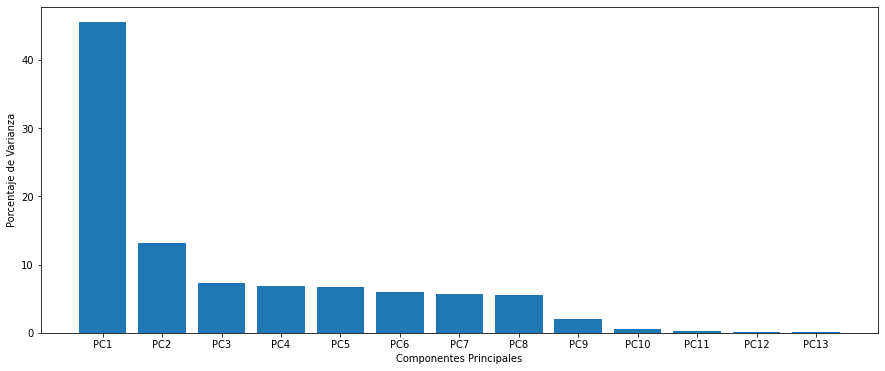

In [ ]:
pcaVariations = np.round(pca.explained_variance_ratio_ *100,decimals = 2)
#Generamos etiquetas para realizar una visualizacion de nuestros componentes principales
labels = ['PC'+str(x) for x in range(1,len(pcaVariations)+1)]
plt.figure(figsize=(15, 6))


plt.bar(x=range(1,len(pcaVariations)+1),height = pcaVariations,tick_label = labels)
plt.ylabel('Porcentaje de Varianza')
plt.xlabel('Componentes Principales')
plt.show()



<p>Notamos que los primeros dos componentes aportan mas del 50% de la informacion a la base de datos</p>

<h2>Paso 2</h2>
<p>Examinamos la magnitud y la direccion de los coeficientes de las variables originales</p>

In [ ]:
scaledDataDf = pd.DataFrame(scaledData.transpose(),index = filledDataset.columns)

#Calculamos el total de varianza de las variables originales
totalVariableVariance = scaledDataDf.transpose().var().sum()

#Obtenemos el diccionario de porcentajes de varianza que resulta ser igual para cada variable
dictionaryVariableVariance = {
    'Porcentaje de varianza':(scaledDataDf.transpose().var()/totalVariableVariance)*100,
    'Porcentaje acumulado de varianza':(scaledDataDf.transpose().var().cumsum()/totalVariableVariance)*100
    }

print(pd.DataFrame(dictionaryVariableVariance))
print('Varianza total por variables originales:', totalVariableVariance)
print('Notamos que es la misma que la varianza de PCA')
print('Varianza total por componentes:',pca.explained_variance_.sum())





     Porcentaje de varianza  Porcentaje acumulado de varianza
X1                 7.692308                          7.692308
X12                7.692308                         15.384615
X13                7.692308                         23.076923
X14                7.692308                         30.769231
X15                7.692308                         38.461538
X16                7.692308                         46.153846
X17                7.692308                         53.846154
X18                7.692308                         61.538462
X19                7.692308                         69.230769
X20                7.692308                         76.923077
X21                7.692308                         84.615385
X22                7.692308                         92.307692
X23                7.692308                        100.000000
Varianza total por variables originales: 13.00043372368465
Notamos que es la misma que la varianza de PCA
Varianza total por compone

<h2>Para conocer la relacion que existe entre cada componente y cada variable, realizamos una matriz de covarianza</h2>

In [ ]:
componentsDf = pd.DataFrame(
    pca.components_.round(3),
    #las columnas sean los PCs
    columns = labels,
    #para las filas utilizamos los nombres de las variables originales
    index = scaledDataDf.transpose().columns
)
print(componentsDf.abs())

       PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9   PC10  \
X1   0.165  0.373  0.384  0.389  0.392  0.389  0.381  0.135  0.117  0.128   
X12  0.294  0.191  0.174  0.126  0.119  0.105  0.093  0.386  0.411  0.395   
X13  0.393  0.074  0.004  0.072  0.081  0.051  0.045  0.394  0.411  0.266   
X14  0.050  0.041  0.084  0.111  0.031  0.102  0.172  0.236  0.145  0.224   
X15  0.104  0.039  0.025  0.102  0.011  0.103  0.070  0.033  0.398  0.134   
X16  0.256  0.003  0.033  0.116  0.122  0.014  0.005  0.179  0.252  0.752   
X17  0.800  0.018  0.013  0.025  0.045  0.035  0.065  0.170  0.072  0.285   
X18  0.109  0.007  0.136  0.097  0.033  0.044  0.012  0.735  0.595  0.029   
X19  0.031  0.567  0.387  0.123  0.205  0.420  0.489  0.057  0.051  0.145   
X20  0.006  0.416  0.038  0.485  0.523  0.068  0.513  0.048  0.147  0.000   
X21  0.016  0.433  0.345  0.496  0.489  0.250  0.339  0.069  0.069  0.125   
X22  0.000  0.184  0.330  0.086  0.362  0.718  0.428  0.045  0.039  0.025   

<p>A continuacion presentamos las variables originales que se relacionan mejor con los componentes principales</p>

In [ ]:
componentsDf.abs().idxmax()

PC1     X17
PC2     X19
PC3     X23
PC4     X23
PC5     X20
PC6     X22
PC7     X20
PC8     X18
PC9     X18
PC10    X16
PC11    X14
PC12    X15
PC13    X14
dtype: object

<h2>Paso 3</h2>
<p>Grafica de valores atipicos</p>

72.8125806593967


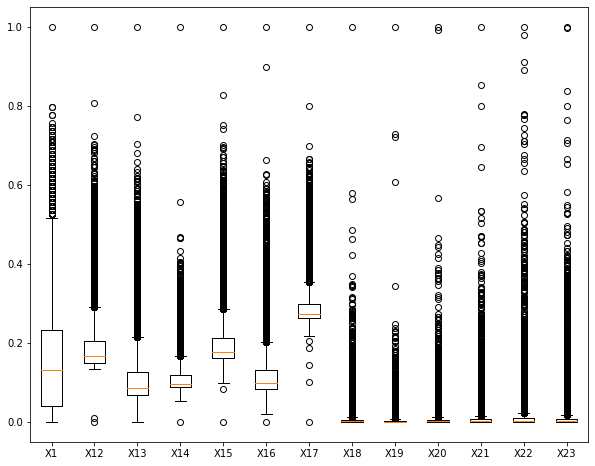

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.figure(figsize =(10, 8))

#primero cambiamos la escala para que sea mas facil la visualizacion 
#a un rango de -1 a 1
minMax = MinMaxScaler()
minMaxScaled = minMax.fit_transform(scaledData)

plt.boxplot(minMaxScaled,labels =scaledDataDf.transpose().columns)
plt.show()


<h2>Parte 2<h2>

<ol>
  <li><b>Cual es el numero de componentes mínimos y por que?: </b>
   <p>La cantidad de componentes minimos podria ser 2 ya que con esta cantidad superamos el 50% de la informacion. Sin embargo con 7 componentes obtenemos mas del 85% de la informacin</p>
  </li>
  <li><b>Cual es la variacion de los datos que representan esos componentes?: </b>
   <p>La variacion acumulada de los primeros dos componentes es 7.6264 y de los siete componentes es de 12.575. Tomando en cuenta que la viariacion total es de 13.0004337236</p>
  </li>
  <li><b>Cual es la perdida de informacion despues de realizar PCA: </b>
   <p>No hay perdida de informacion despues de realizar PCA. La informacion simplemente se distribuye entre los componentes principales de tal manera que ninguno de los componentes principales comparta informacion. Arriba podemos notar que la variacion total de las variables originales es de 13.0004337236 e igualmente la variacion total de PCA es 13.0004337236</p>
  </li>
  <li><b>De las variables originales, Cual tiene mayor y cual tienen menor importancia en los componentes principales? </b>
   <p>La variable original X17 es la que se relaciona mas con PC1 que es asu vez el componente principal que tiene mayor relevancia. Por lo tanto concluimos que X17 es a su vez la variable de mayor importancia.</p>
   <p>Por otro lado X14 se relaciona con P13 que es el componente principal menos importante. Por lo tanto X14 es la variable que menos informacion proporciona a la base de datos</p>
  </li>
  <li><b>Cuando se recomienda relizar PCA y que beneficios ofrece para Machine Learning </b>
   <p>Es recomendable utilizar PCA cuando tenemos una fuerte correlacion entre las variables originales. Ademas, si nuestra base de datos es muy extensa, PCA nos ayuda a procesar los datos con mayor agilidad. Otra ventaja que tiene PCA es que; si por ejemplo tenemos una base de datos con multiples dimensiones, podemos obtener sus dos componentes principales para realizar una visualizacion de los datos y asi darnos una idea de como estan distribuidos.</p>
</ol>